# R* and MRA* comparison*

## Настройка окружения

In [1]:
import matplotlib.pyplot as plt
from scipy.ndimage.filters import uniform_filter1d

plt.rcParams['figure.figsize'] = [15, 5]
EPS = 0.000001

In [2]:
import sys
import os

search_tools_path = os.path.join(os.getcwd(), 'search_tools')
if search_tools_path not in sys.path:
    sys.path.append(search_tools_path)

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from moving_ai.mai_map_reader import MaiReader, MaiMaps
from pipeline import Pipeline
from moving_ai.mai_map_visualizer import VisualizeMaiMap, VisualizeMaiMapGif

from algorithms.astar_heuristics import diagonal_dist
from algorithms.mrastar import MRAstar
from algorithms.wastar import WAstar
from algorithms.astar import Astar
from algorithms.rstar import Rstar

In [5]:
from processors.plot_expanded_and_actual_length_ratio import PlotExpandedAndActualLengthRatio
from processors.plot_success_rate import PlotSuccessRate
from processors.plot_mean_expanded import PlotMeanExpanded

## Сравнение алгоритмов на разных картах

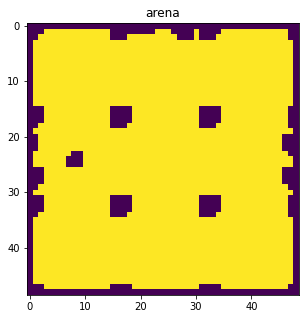

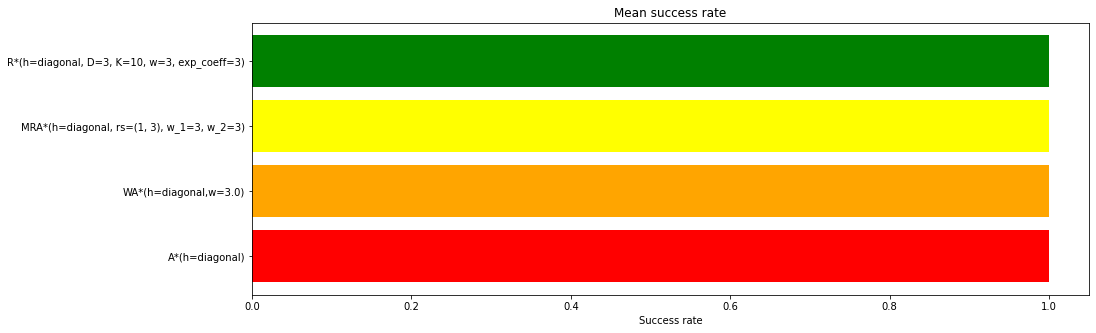

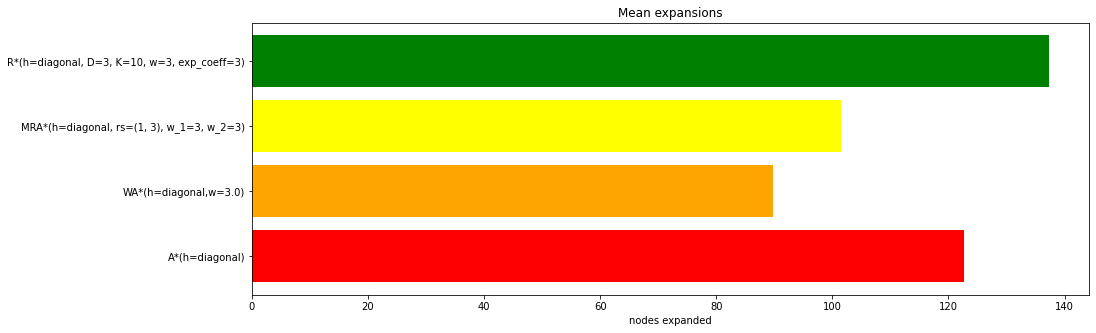

In [6]:
area = MaiMaps.ARENA
algorithms = [
    Astar(diagonal_dist),
    WAstar(diagonal_dist, 3),
    MRAstar(diagonal_dist, resolutions=(1, 3), w_1=3, w_2=3),
    Rstar(diagonal_dist, D=3, K=10, w=3, exp_coeff=3)
]
MaiReader(area).read_map().draw(area)

p = Pipeline(
    reader=MaiReader(area),
    algorithms=algorithms,
    processor=PlotSuccessRate().then(PlotMeanExpanded()),
    timelimit=3
)

p.run()

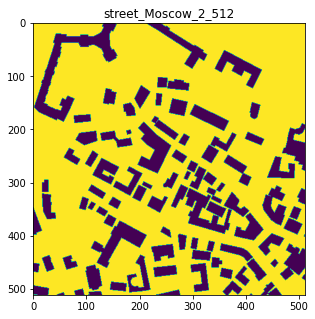

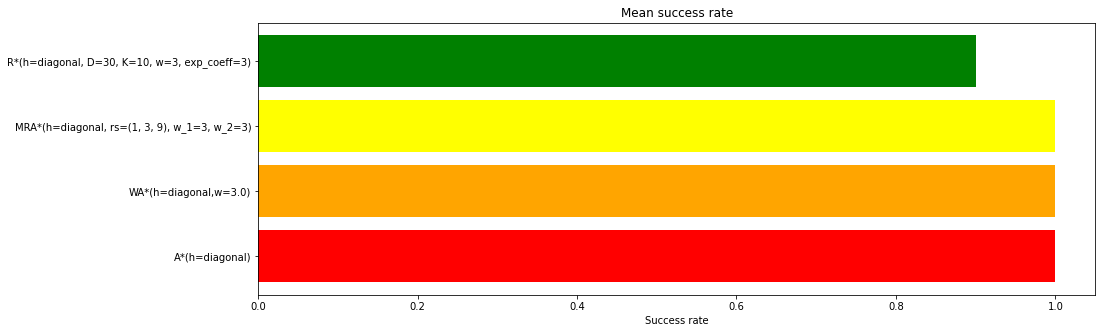

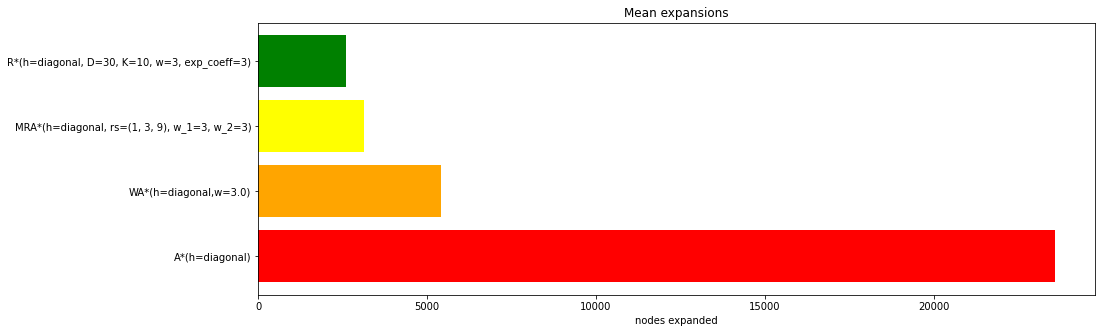

In [8]:
area = MaiMaps.MOSCOW
algorithms = [
    Astar(diagonal_dist),
    WAstar(diagonal_dist, 3),
    MRAstar(diagonal_dist, resolutions=(1, 3, 9), w_1=3, w_2=3),
    Rstar(diagonal_dist, D=30, K=10, w=3, exp_coeff=3)
]

MaiReader(area).read_map().draw(area)

p = Pipeline(
    reader=MaiReader(area, 10),
    algorithms=algorithms,
    processor=PlotSuccessRate().then(PlotMeanExpanded()),
    timelimit=10
)

p.run()

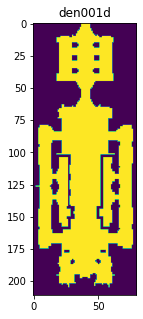

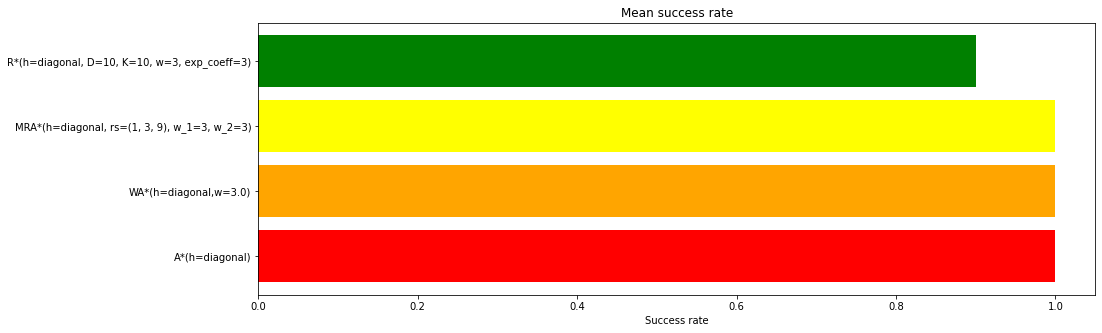

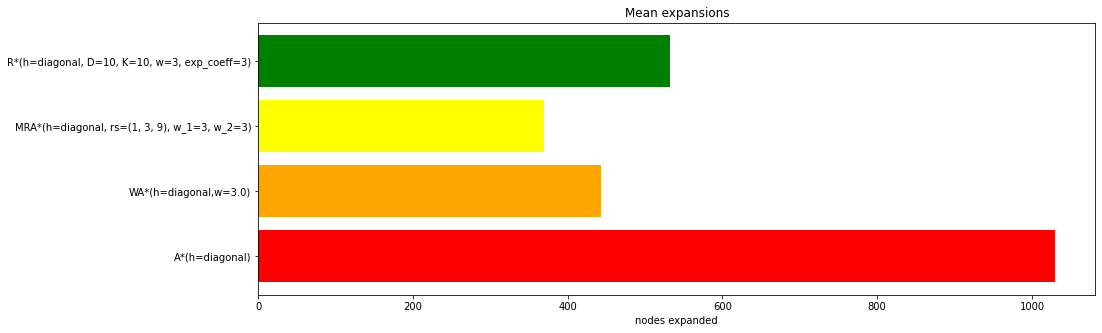

In [9]:
area = MaiMaps.DEN001D
algorithms = [
    Astar(diagonal_dist),
    WAstar(diagonal_dist, 3),
    MRAstar(diagonal_dist, resolutions=(1, 3, 9), w_1=3, w_2=3),
    Rstar(diagonal_dist, D=10, K=10, w=3, exp_coeff=3)
]

MaiReader(area).read_map().draw(area)

p = Pipeline(
    reader=MaiReader(area, 20),
    algorithms=algorithms,
    processor=PlotSuccessRate().then(PlotMeanExpanded()),
    timelimit=5
)

p.run()

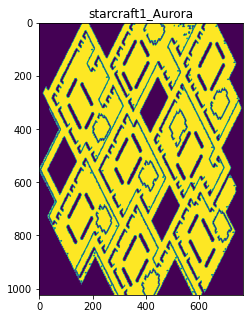

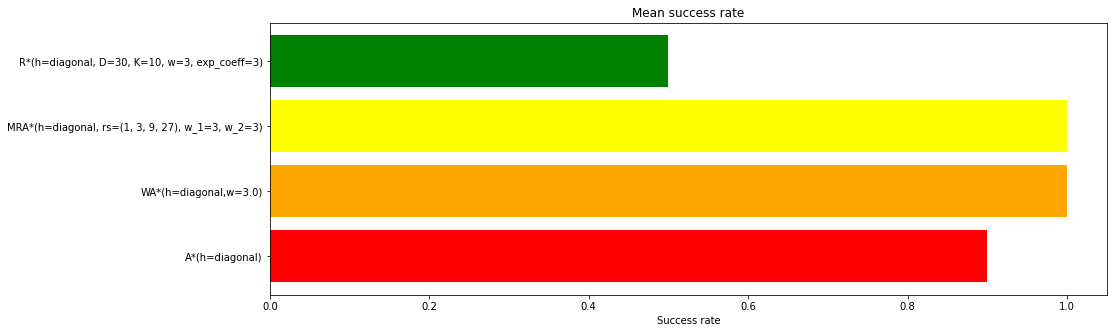

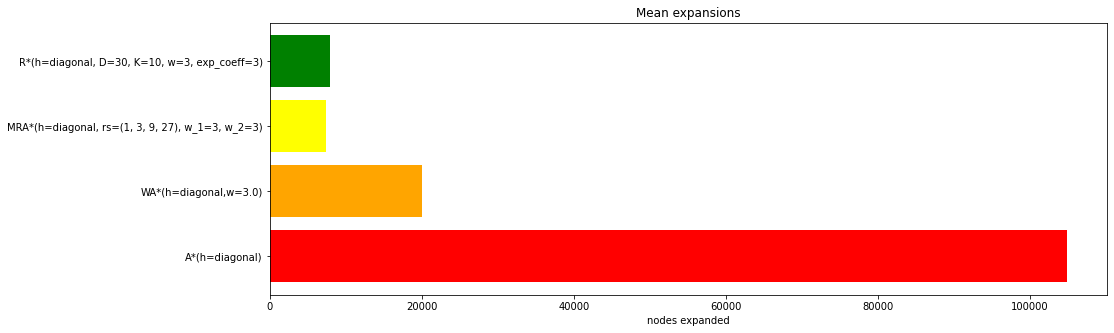

In [10]:
area = MaiMaps.STARCRAFT
algorithms = [
    Astar(diagonal_dist),
    WAstar(diagonal_dist, 3),
    MRAstar(diagonal_dist, resolutions=(1, 3, 9, 27), w_1=3, w_2=3),
    Rstar(diagonal_dist, D=30, K=10, w=3, exp_coeff=3)
]

MaiReader(area).read_map().draw(area)

p = Pipeline(
    reader=MaiReader(area, 10),
    algorithms=algorithms,
    processor=PlotSuccessRate().then(PlotMeanExpanded()),
    timelimit=10
)

p.run()

## Зависимость от гиперпараметров

### R*

In [9]:
area = MaiMaps.MOSCOW

params = (
    {'D':10, 'K':5 , 'w':2, 'exp_coeff':3},
    {'D':10, 'K':10, 'w':2, 'exp_coeff':3},
    {'D':20, 'K':5 , 'w':2, 'exp_coeff':3},
    {'D':20, 'K':10, 'w':2, 'exp_coeff':3},
    {'D':30, 'K':5 , 'w':3, 'exp_coeff':4},
    {'D':30, 'K':10, 'w':3, 'exp_coeff':4},
    {'D':40, 'K':5 , 'w':3, 'exp_coeff':4},
    {'D':40, 'K':10, 'w':3, 'exp_coeff':4}
)
algorithms = [Rstar(diagonal_dist, **p) for p in params]

p = Pipeline(
    reader=MaiReader(area, 25),
    algorithms=algorithms,
    processor=PlotSuccessRate().then(PlotMeanExpanded()),
    timelimit=8
)

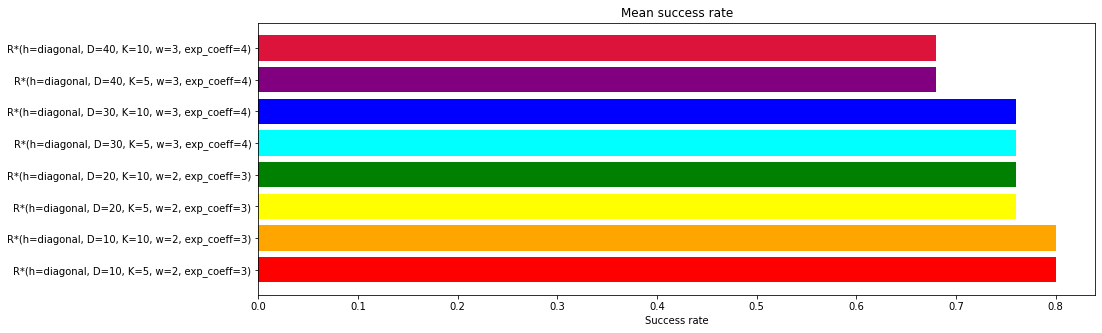

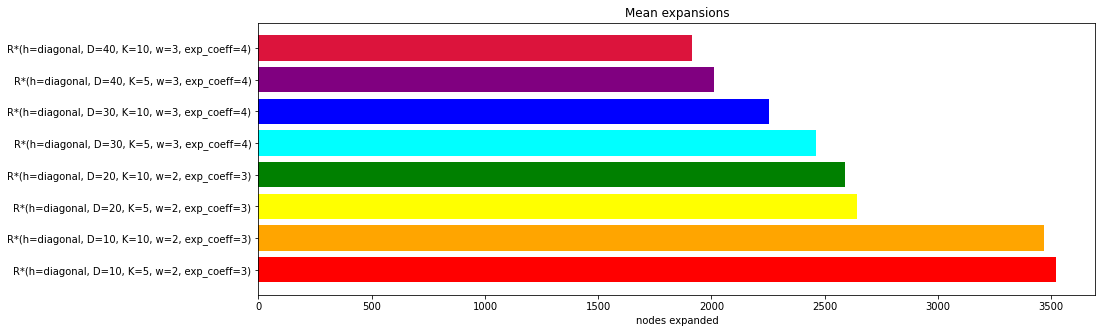

In [10]:
p.run()

## MRA*

In [6]:
area = MaiMaps.MOSCOW
params = (
    {'resolutions':(1, 3), 'w_1':3, 'w_2':3},
    {'resolutions':(1, 3), 'w_1':3, 'w_2':2},
    {'resolutions':(1, 3, 9), 'w_1':2, 'w_2':3},
    {'resolutions':(1, 3, 9), 'w_1':3, 'w_2':3},
    {'resolutions':(1, 3, 9), 'w_1':3, 'w_2':2},
    {'resolutions':(1, 3, 9, 27), 'w_1':3, 'w_2':3},
    {'resolutions':(1, 3, 9, 27), 'w_1':3, 'w_2':2},
    {'resolutions':(1, 3, 9, 27), 'w_1':2, 'w_2':3},
)
algorithms = [MRAstar(diagonal_dist, **p) for p in params]

moscow_reader = MaiReader(area).with_sampled_count_tasks(50)
p = Pipeline(
    reader=moscow_reader,
    algorithms=algorithms,
    processor=PlotSuccessRate().then(PlotMeanExpanded()),
    timelimit=8,
    jobs=1
)

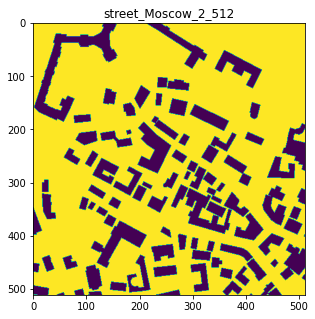

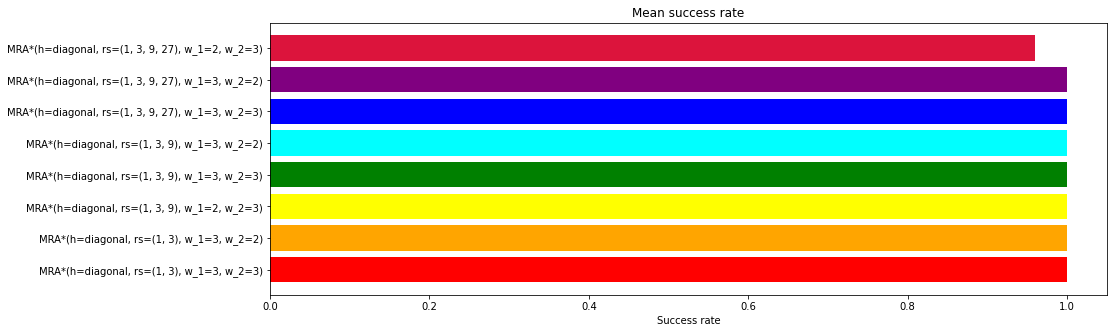

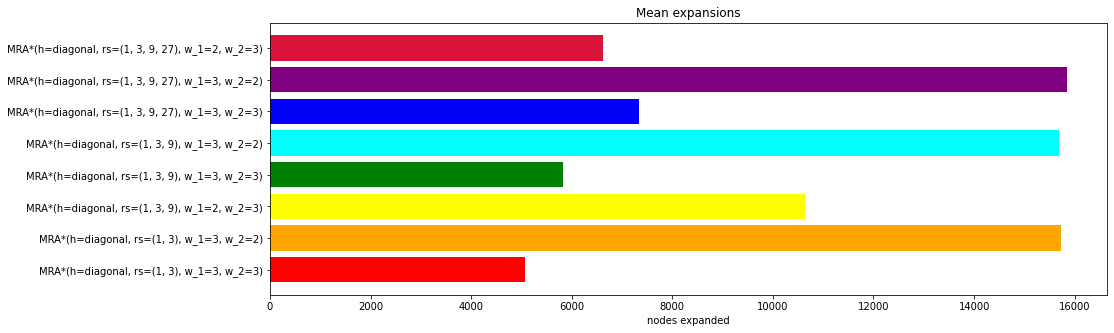

In [9]:
moscow_reader.read_map().draw(area)
p.run()

In [10]:
best_rstar = Rstar(diagonal_dist, **{'D':30, 'K':5 , 'w':3, 'exp_coeff':4})
best_mrastar = MRAStar(diagonal_dist, **{'resolutions':(1, 3), 'w_1':3, 'w_2':3})
sel_task = max(p.reader.read_tasks(), key=lambda x:x.opt_len)
reader = p.reader.with_task(sel_task)

p2 = Pipeline(
    reader=moscow_reader.with_task(sel_task),
    algorithms=[best_rstar, best_mrastar],
    processor=VisualizeMaiMap(),
    timelimit=8
)

p2.run()

NameError: name 'MRAStar' is not defined